In [1]:

import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
df = pd.read_csv('data/train_master.csv', parse_dates=['date'])

In [ ]:
import os
from tqdm.auto import tqdm

os.makedirs('autocorrelation', exist_ok=True)

for g in tqdm(df.groupby(['sku', 'city'])):
    ts = g[1]
    plot_acf(ts['demand'])
    pyplot.savefig(f'autocorrelation/acf_{g[0][0]}_{g[0][1]}.png')
    pyplot.close()

c:\Users\tjqtj\miniconda3\envs\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1000/1000 [00:50<00:00, 19.77it/s]


In [2]:
import os
from tqdm.auto import tqdm

os.makedirs('demand', exist_ok=True)

for g in tqdm(df.groupby(['sku', 'city'])):
    ts = g[1]
    pyplot.plot(ts['date'], ts['demand'])
    pyplot.savefig(f'demand/acf_{g[0][0]}_{g[0][1]}.png')
    pyplot.close()

c:\Users\tjqtj\miniconda3\envs\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1000/1000 [00:45<00:00, 21.91it/s]


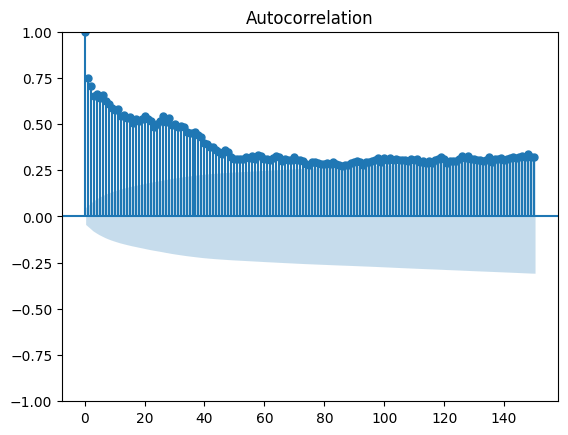

In [15]:

series = df.loc[(df['sku'] == 'SKU0001') & (df['city'] == 'Seoul')]

plot_acf(series['demand'], lags=150) 
pyplot.show()

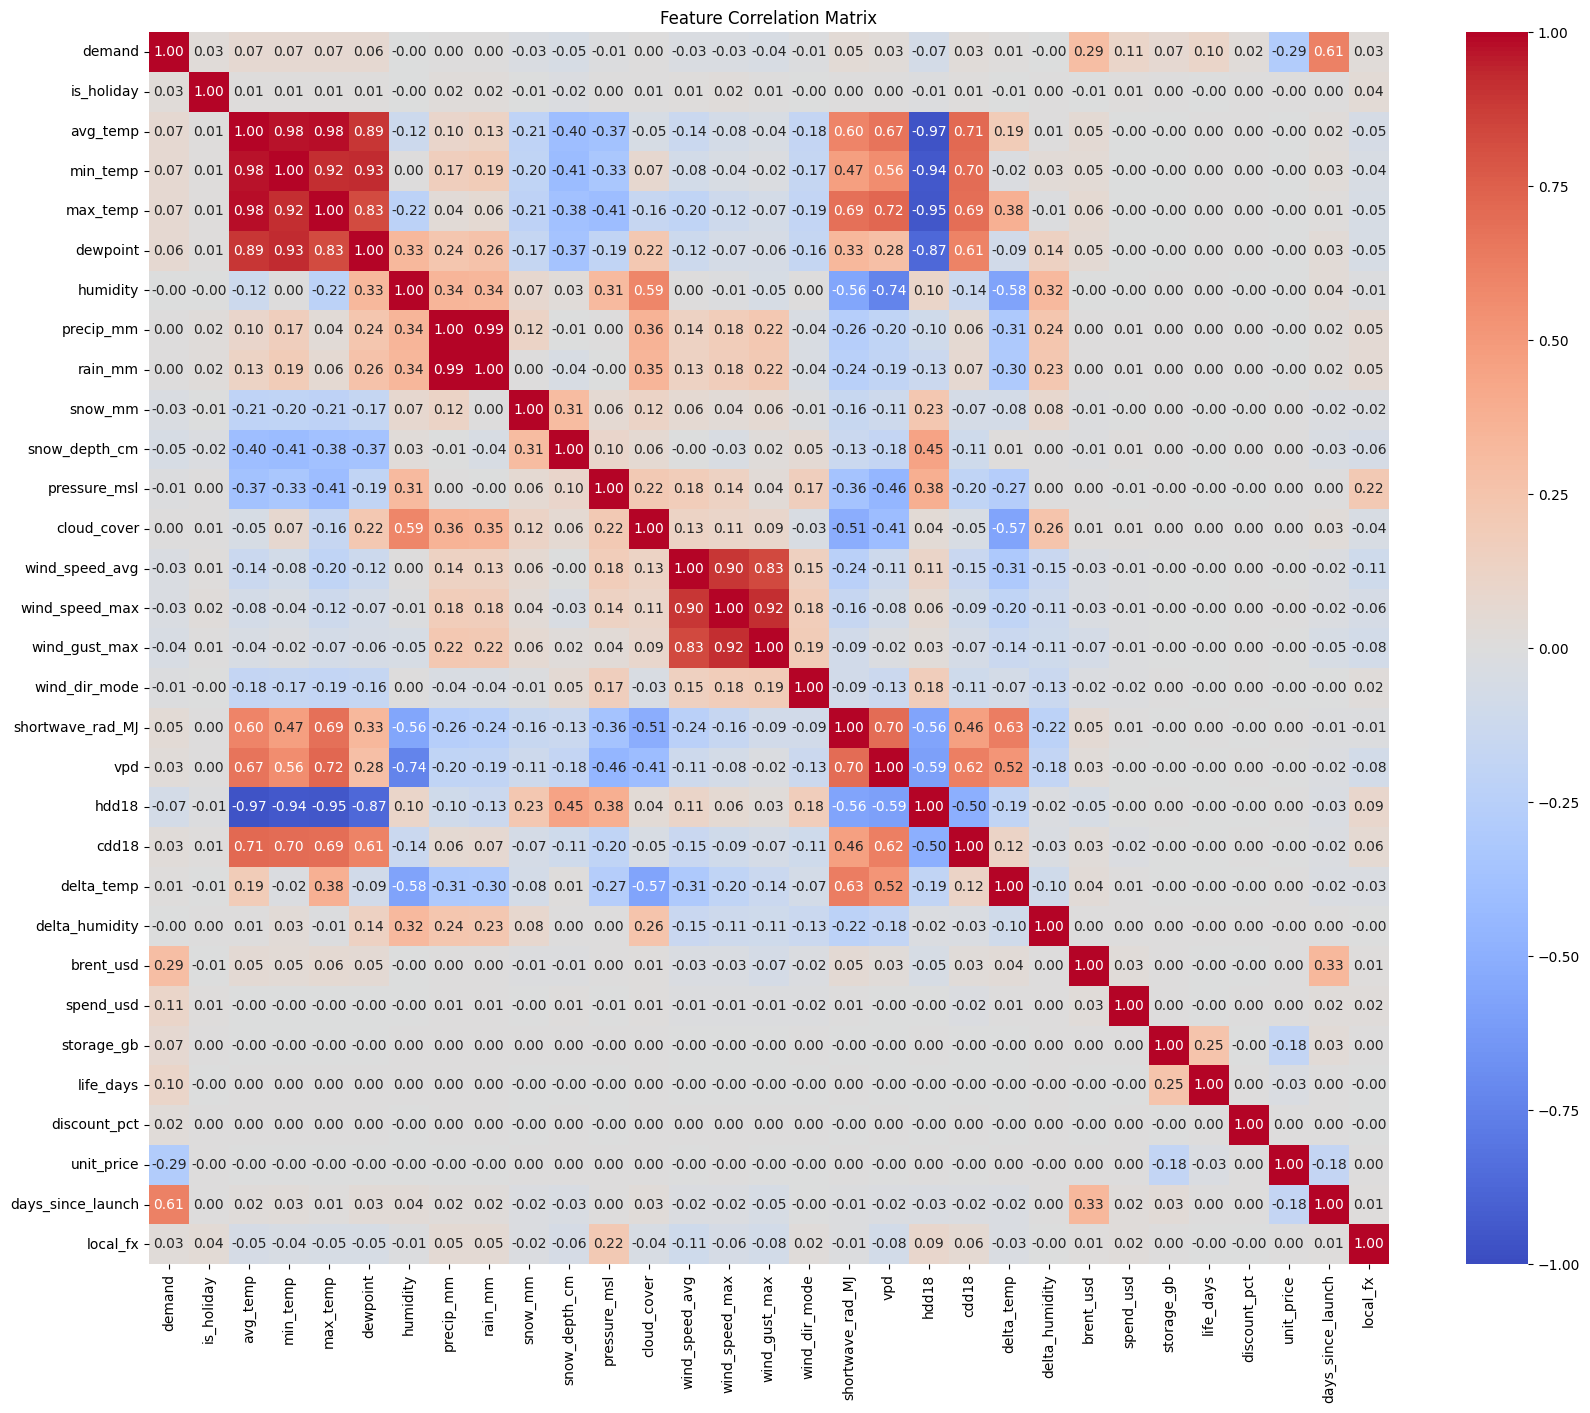

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df_dum = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)
num_cols = df_dum.select_dtypes(include=['number']).columns
corr_matrix = df_dum[num_cols].corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


In [27]:
print(len(df))

1826000


In [ ]:
abs_list = []
for (sku, city), ts in tqdm(df.groupby(['sku', 'city'])):
    # 1) 수치형 칼럼만 뽑고
    num_cols = ts.select_dtypes(include='number').columns
    # 2) demand와의 상관계수 절댓값 계산
    abs_corr = ts[num_cols].corr()['demand'].abs()
    # 3) 시리즈에 그룹명(옵션)을 붙여서 리스트에 저장
    abs_corr.name = f"{sku}_{city}"
    abs_list.append(abs_corr)

abs_df = pd.concat(abs_list, axis=1)
mean_abs_corr = abs_df.mean(axis=1)
print(mean_abs_corr.sort_values(ascending=False))

           
# sum = pd.concat(sum)
# print(sum.head())
# print(absolute.sort_values(ascending=False))

100%|██████████| 1000/1000 [00:02<00:00, 393.89it/s]

demand               1.000000
days_since_launch    0.644012
brent_usd            0.381227
local_fx             0.310405
spend_usd            0.137750
dewpoint             0.105540
min_temp             0.089520
hdd18                0.088862
max_temp             0.087890
avg_temp             0.084407
vpd                  0.077440
humidity             0.064561
snow_depth_cm        0.062359
delta_temp           0.061026
wind_gust_max        0.058293
shortwave_rad_MJ     0.058168
cdd18                0.052343
wind_speed_max       0.048396
cloud_cover          0.045004
wind_speed_avg       0.044466
pressure_msl         0.039643
snow_mm              0.038058
is_holiday           0.035227
discount_pct         0.033835
rain_mm              0.026922
wind_dir_mode        0.026846
precip_mm            0.026151
delta_humidity       0.010838
storage_gb                NaN
life_days                 NaN
unit_price                NaN
dtype: float64


In [32]:
print(abs_df.describe())

       SKU0001_Berlin  SKU0001_Birmingham  SKU0001_Brasilia  SKU0001_Brisbane  \
count       28.000000           28.000000         26.000000         28.000000   
mean         0.145183            0.146685          0.140620          0.143244   
std          0.230741            0.218674          0.238404          0.221724   
min          0.007297            0.014476          0.001227          0.010652   
25%          0.026885            0.044991          0.019479          0.031146   
50%          0.059084            0.074230          0.058474          0.071897   
75%          0.123930            0.128500          0.105574          0.138967   
max          1.000000            1.000000          1.000000          1.000000   

       SKU0001_Busan  SKU0001_Canberra  SKU0001_Cape_Town  SKU0001_Chicago  \
count      28.000000         28.000000          27.000000        27.000000   
mean        0.129930          0.131079           0.126509         0.132530   
std         0.233020          0.2208

In [26]:
sum

demand               1.000000
is_holiday           0.028297
avg_temp             0.124618
min_temp             0.120505
max_temp             0.123701
                       ...   
life_days                 NaN
discount_pct         0.068297
unit_price                NaN
days_since_launch    0.578553
local_fx                  NaN
Name: demand, Length: 31000, dtype: float64

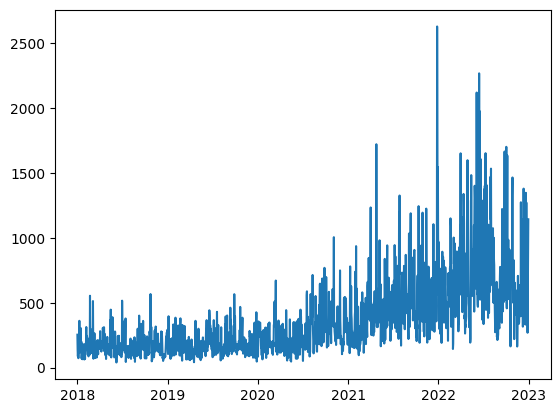

In [22]:
pyplot.plot(series['date'], series['demand'])

In [14]:
print(df.columns)

Index(['date', 'sku', 'city', 'demand', 'country', 'season', 'is_holiday',
       'avg_temp', 'min_temp', 'max_temp', 'dewpoint', 'humidity', 'precip_mm',
       'rain_mm', 'snow_mm', 'snow_depth_cm', 'pressure_msl', 'cloud_cover',
       'wind_speed_avg', 'wind_speed_max', 'wind_gust_max', 'wind_dir_mode',
       'shortwave_rad_MJ', 'vpd', 'hdd18', 'cdd18', 'delta_temp',
       'delta_humidity', 'brent_usd', 'category', 'spend_usd', 'family',
       'storage_gb', 'colour', 'life_days', 'discount_pct', 'unit_price',
       'days_since_launch', 'local_fx'],
      dtype='object')


In [13]:
import os
from tqdm.auto import tqdm

os.makedirs('demand', exist_ok=True)

change_points = []
for g in tqdm(df.groupby(['sku', 'city'])):
    print(len(g[1]))
    break
    ts = g[1]
    # 2) 이전 행의 season과 비교하여 다른 경우만 True
    change_mask = ts['season'] != ts['season'].shift(1)

    # 3) 첫 행(shift 결과 NaN) 제외하고 계절이 바뀌는 지점만 추출
    for d in ts['date']:
        change_points.append(d)
    # change_points.extend(ts.loc[change_mask & ts['season'].notna(), ['date', 'season']])

res = set(change_points)
print(len(res))

  0%|          | 0/1000 [00:00<?, ?it/s]

1826
0


In [6]:
print(res.head())

        0
0    date
1  season
2    date
3  season
4    date


File loaded and 'date' column converted to datetime successfully.
        date country category  spend_usd
0 2018-01-01     USA       TV   40392.52
1 2018-01-02     USA       TV   40392.52
2 2018-01-03     USA   SOCIAL   40392.52
3 2018-01-04     USA       TV   40392.52
4 2018-01-05     USA      OOH   40392.52

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25570 entries, 0 to 25569
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       25570 non-null  datetime64[ns]
 1   country    25570 non-null  object        
 2   category   25570 non-null  object        
 3   spend_usd  25570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 799.2+ KB

Country Codes:
['USA' 'DEU' 'FRA' 'KOR' 'JPN' 'GBR' 'CAN' 'AUS' 'BRA' 'ZAF']

Analysis for 2018 event in KOR:
  - Average daily spend during event: $26,538.34
  - Average daily spend outside event: $15,778.94
  -

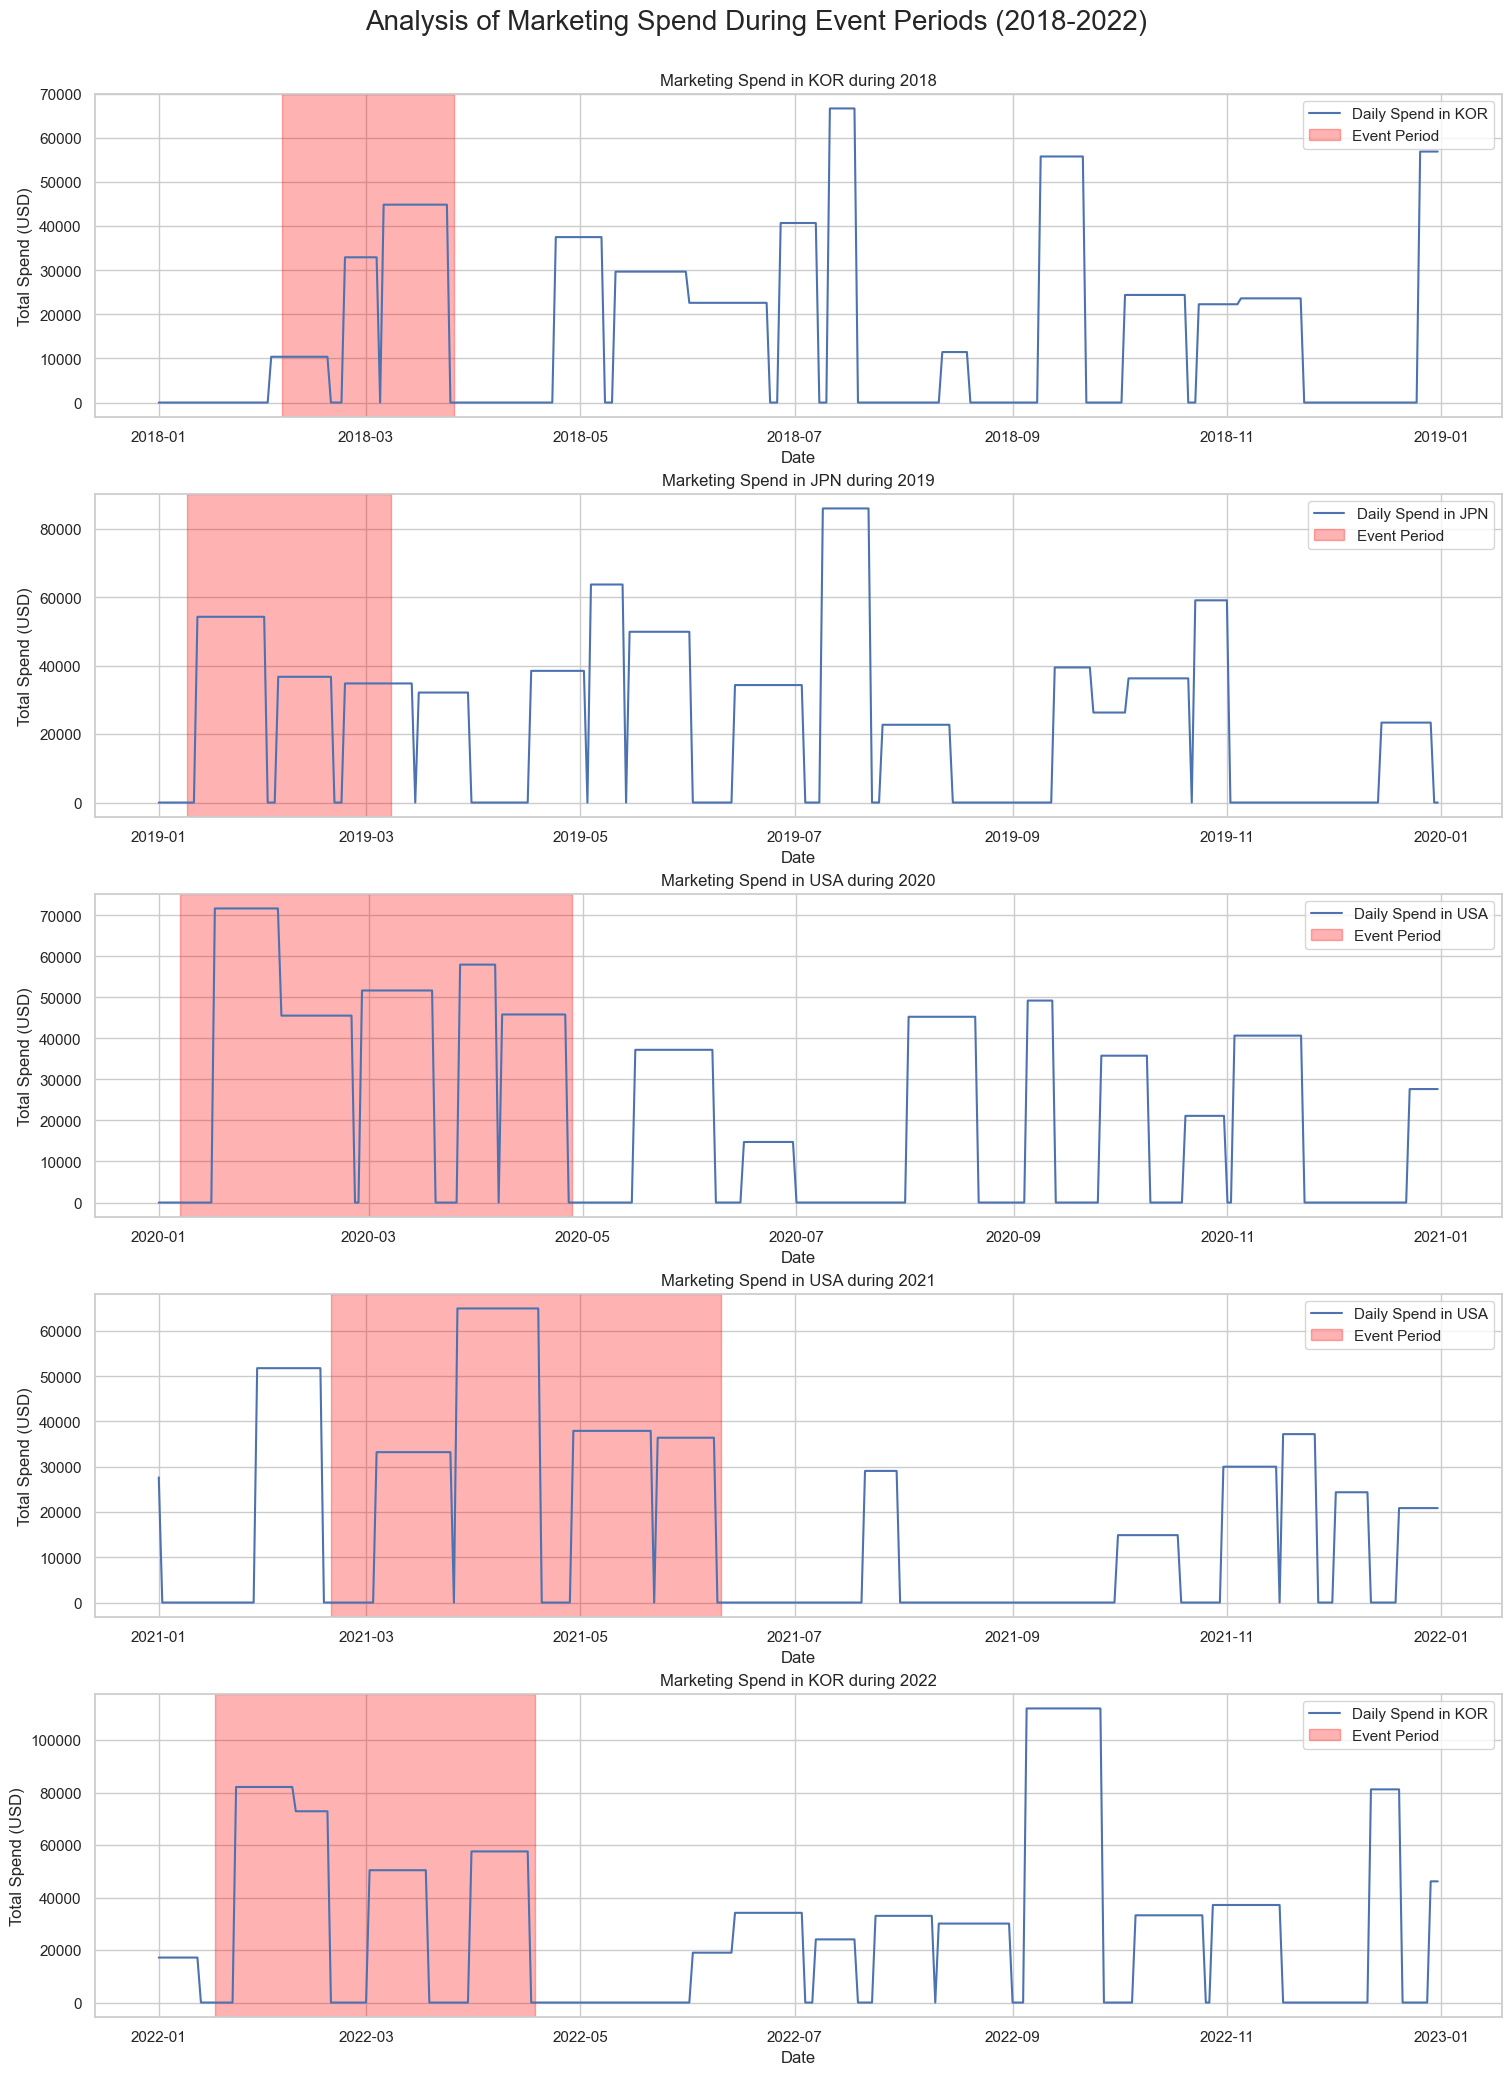

C:\Users\tjqtj\AppData\Local\Temp\ipykernel_18696\338790119.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_days['date_diff'] = active_days['date'].diff().dt.days
C:\Users\tjqtj\AppData\Local\Temp\ipykernel_18696\338790119.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_days['period_id'] = (active_days['date_diff'] > 1).cumsum()
C:\Users\tjqtj\AppData\Local\Temp\ipykernel_18696\338790119.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

--- Predicted Event for 2018 ---
country                          DEU
start_date       2018-05-01 00:00:00
end_date         2018-06-02 00:00:00
total_spend               2744475.54
duration_days                     33
Name: 41, dtype: object
--- Predicted Event for 2019 ---
country                          AUS
start_date       2019-04-27 00:00:00
end_date         2019-06-04 00:00:00
total_spend               3350653.85
duration_days                     39
Name: 3, dtype: object
--- Predicted Event for 2020 ---
country                          BRA
start_date       2020-06-23 00:00:00
end_date         2020-07-13 00:00:00
total_spend               2710692.18
duration_days                     21
Name: 15, dtype: object
--- Predicted Event for 2021 ---
country                          AUS
start_date       2021-03-02 00:00:00
end_date         2021-03-25 00:00:00
total_spend               2440220.64
duration_days                     24
Name: 2, dtype: object
--- Predicted Event for 2022 ---
c

C:\Users\tjqtj\AppData\Local\Temp\ipykernel_18696\338790119.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_days['date_diff'] = active_days['date'].diff().dt.days
C:\Users\tjqtj\AppData\Local\Temp\ipykernel_18696\338790119.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_days['period_id'] = (active_days['date_diff'] > 1).cumsum()
C:\Users\tjqtj\AppData\Local\Temp\ipykernel_18696\338790119.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


--- Predicted Event for 2024 ---
country                          DEU
start_date       2024-02-13 00:00:00
end_date         2024-04-15 00:00:00
total_spend                3281242.0
duration_days                     63
Name: 39, dtype: object


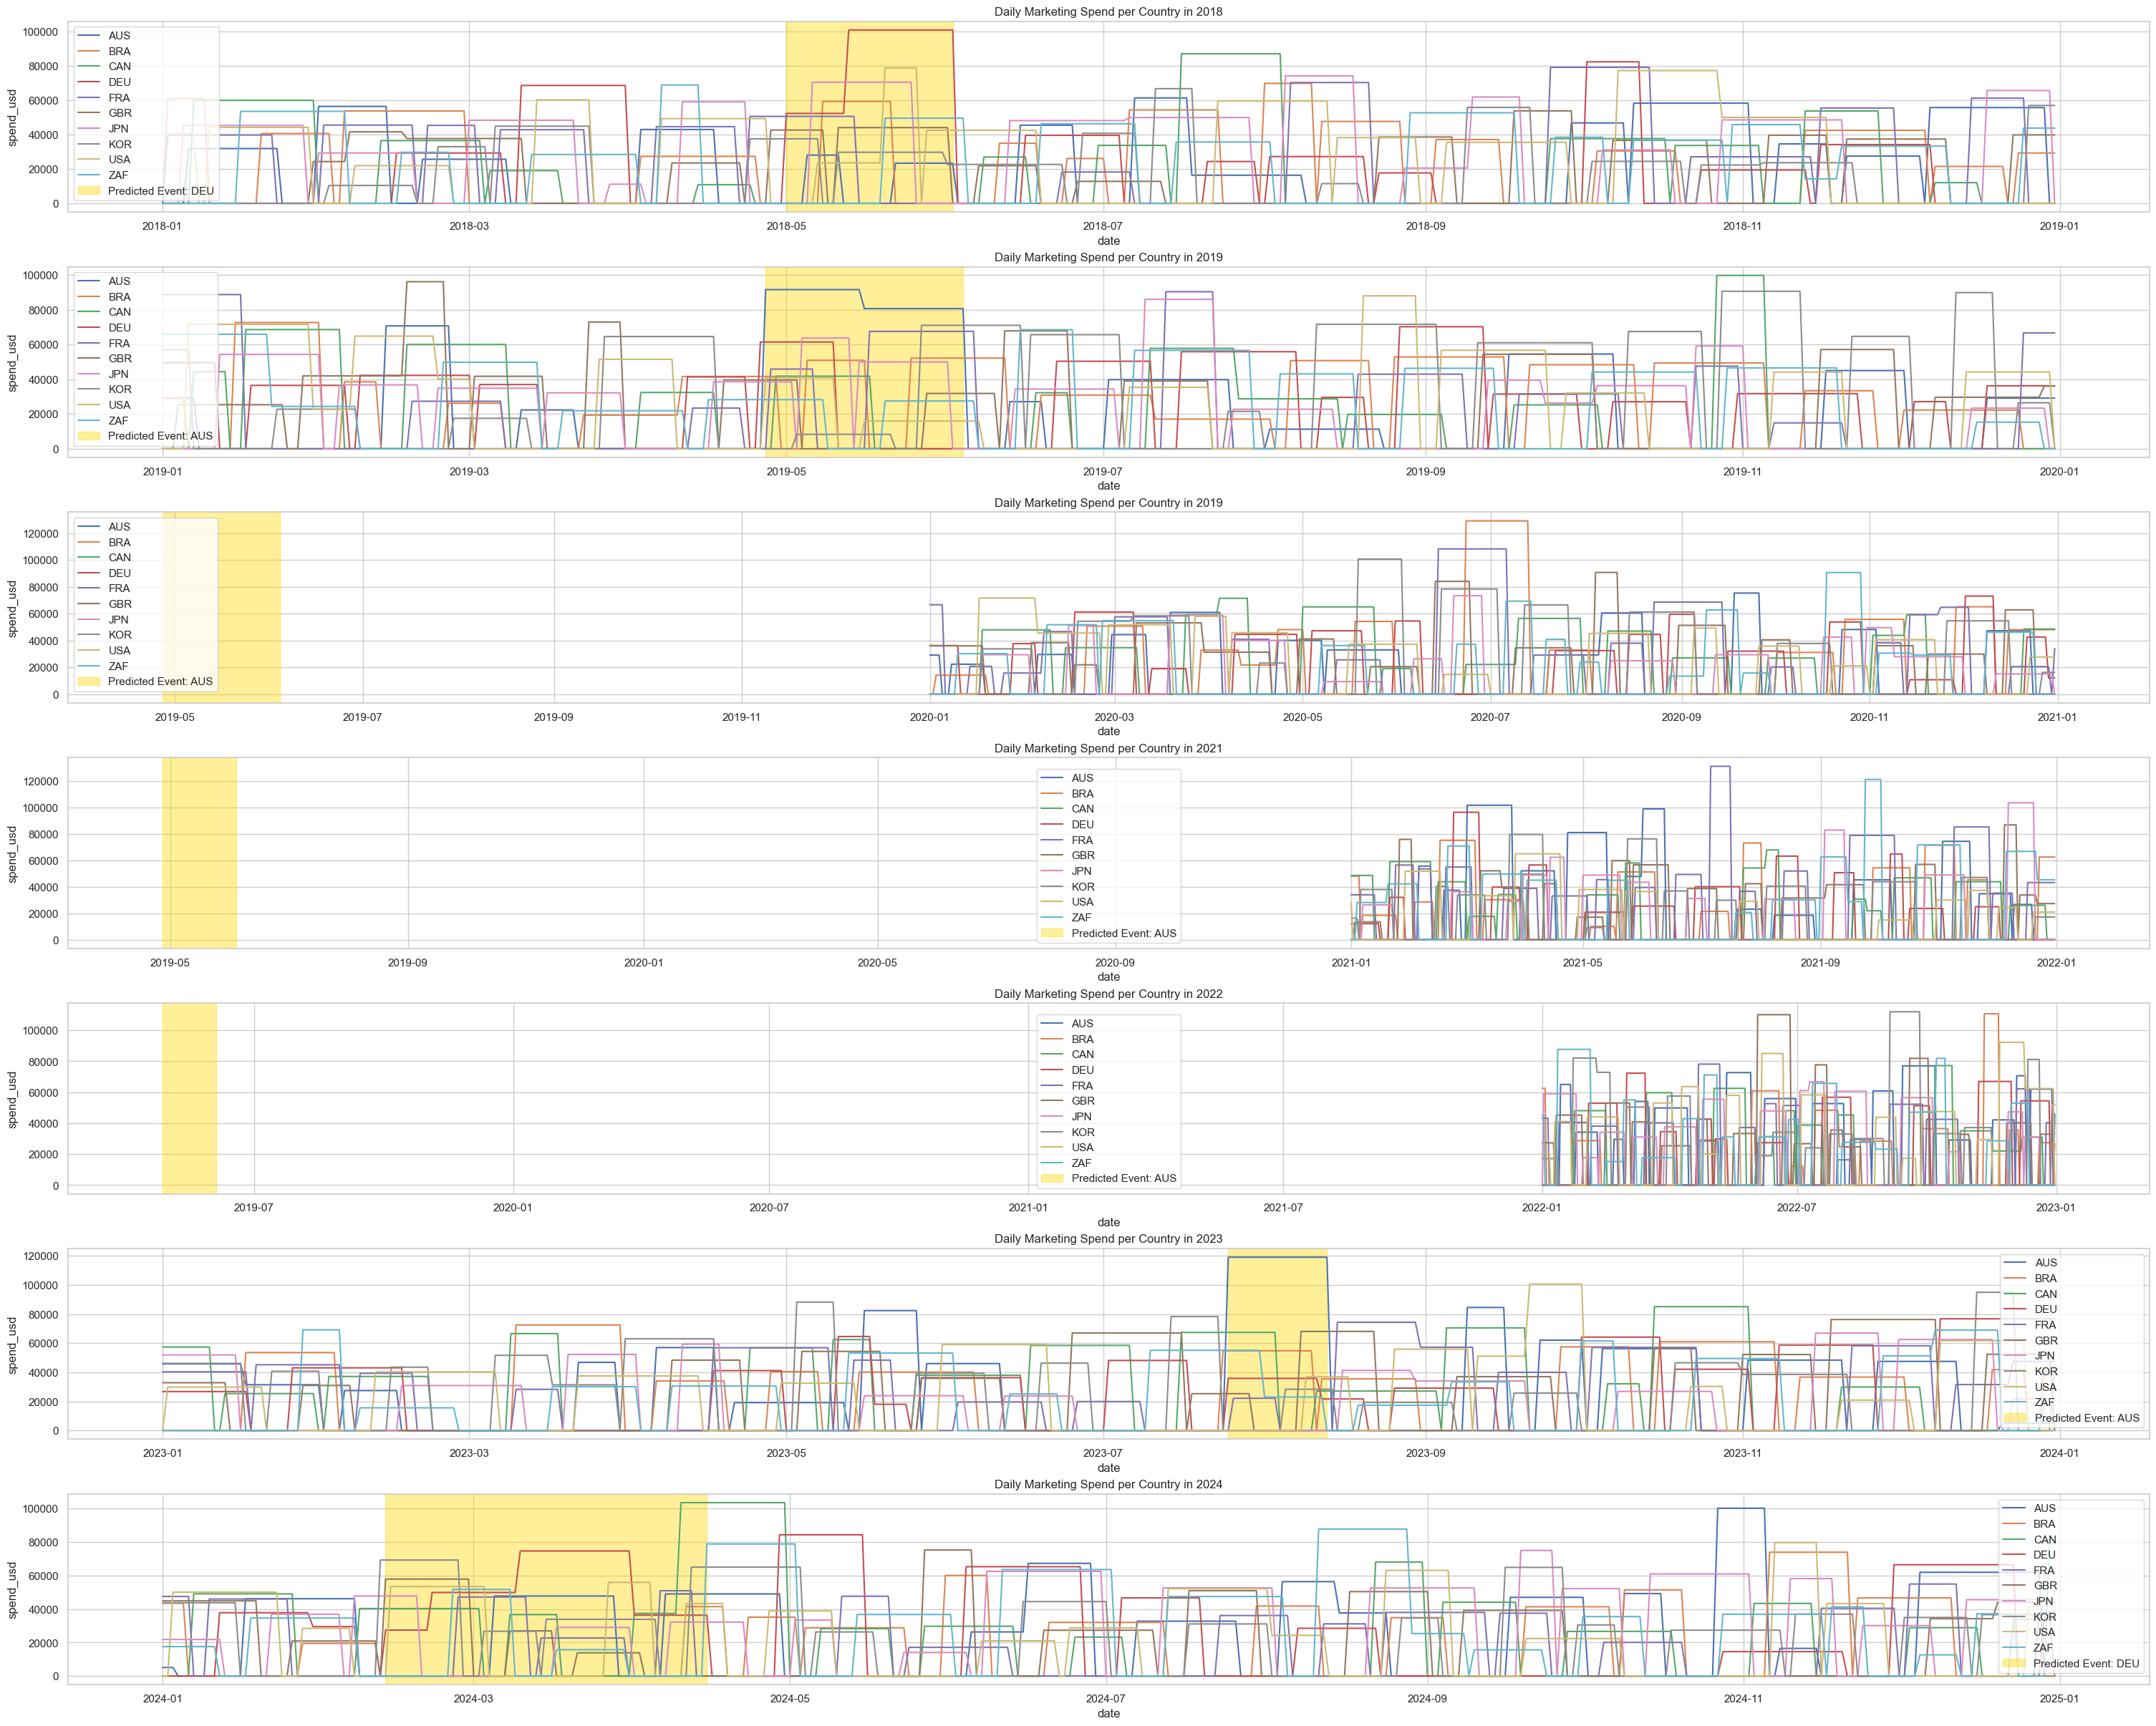

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv('extracted_contents/data/marketing_spend.csv')
df['date'] = pd.to_datetime(df['date'])
print("File loaded and 'date' column converted to datetime successfully.")
print(df.head())
print("\nData Info:")
df.info()
print("\nCountry Codes:")
print(df['country'].unique())

# Define the events
events = {
    2018: {"country": "KOR", "start_date": "2018-02-05", "end_date": "2018-03-26"},
    2019: {"country": "JPN", "start_date": "2019-01-09", "end_date": "2019-03-08"},
    2020: {"country": "USA", "start_date": "2020-01-07", "end_date": "2020-04-28"},
    2021: {"country": "USA", "start_date": "2021-02-19", "end_date": "2021-06-10"},
    2022: {"country": "KOR", "start_date": "2022-01-17", "end_date": "2022-04-18"},
}

# Group by date and country to get total daily spend
daily_spend = df.groupby(['date', 'country'])['spend_usd'].sum().reset_index()

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(events), 1, figsize=(15, 20), constrained_layout=True)

for i, (year, event_info) in enumerate(events.items()):
    country = event_info['country']
    start_date = pd.to_datetime(event_info['start_date'])
    end_date = pd.to_datetime(event_info['end_date'])
    
    # Filter data for the specific country and year
    country_year_spend = daily_spend[
        (daily_spend['country'] == country) & 
        (daily_spend['date'].dt.year == year)
    ]
    
    ax = axes[i]
    sns.lineplot(x='date', y='spend_usd', data=country_year_spend, ax=ax, label=f'Daily Spend in {country}')
    ax.axvspan(start_date, end_date, color='red', alpha=0.3, label='Event Period')
    
    ax.set_title(f'Marketing Spend in {country} during {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Spend (USD)')
    ax.legend()
    
    # Check for correlation
    spend_during_event = country_year_spend[
        (country_year_spend['date'] >= start_date) & (country_year_spend['date'] <= end_date)
    ]['spend_usd'].mean()
    
    spend_outside_event = country_year_spend[
        (country_year_spend['date'] < start_date) | (country_year_spend['date'] > end_date)
    ]['spend_usd'].mean()
    
    print(f"\nAnalysis for {year} event in {country}:")
    print(f"  - Average daily spend during event: ${spend_during_event:,.2f}")
    print(f"  - Average daily spend outside event: ${spend_outside_event:,.2f}")
    if spend_during_event > spend_outside_event * 2: # Using a simple threshold to determine significance
        print("  - Correlation: Strong positive correlation observed. Spend is significantly higher during the event.")
    else:
        print("  - Correlation: No clear correlation observed.")


plt.suptitle('Analysis of Marketing Spend During Event Periods (2018-2022)', fontsize=20, y=1.03)
plt.show()
def find_event_periods(year_df):
    """Finds periods of continuous spending for each country."""
    event_periods = []
    for country in year_df['country'].unique():
        country_df = year_df[year_df['country'] == country].sort_values('date')
        
        # Find days where spending is above zero
        active_days = country_df[country_df['spend_usd'] > 0]
        if active_days.empty:
            continue
            
        # Identify contiguous blocks of active days
        active_days['date_diff'] = active_days['date'].diff().dt.days
        # A new period starts where the difference is more than 1 day (or is the first day)
        active_days['period_id'] = (active_days['date_diff'] > 1).cumsum()
        
        # Calculate total spend for each period
        periods = active_days.groupby('period_id').agg(
            country=('country', 'first'),
            start_date=('date', 'first'),
            end_date=('date', 'last'),
            total_spend=('spend_usd', 'sum'),
            duration_days=('date', lambda x: (x.max() - x.min()).days + 1)
        )
        event_periods.append(periods)
        
    if not event_periods:
        return pd.DataFrame() # Return empty DataFrame if no events found
        
    return pd.concat(event_periods).reset_index(drop=True)


# --- Prediction for 2018 ---
df_2018 = daily_spend[daily_spend['date'].dt.year == 2018]
events_2018 = find_event_periods(df_2018)

if not events_2018.empty:
    # The main event is the one with the highest total spend
    predicted_event_2018 = events_2018.sort_values('total_spend', ascending=False).iloc[0]
    print("--- Predicted Event for 2018 ---")
    print(predicted_event_2018)

df_2019 = daily_spend[daily_spend['date'].dt.year == 2019]
events_2019 = find_event_periods(df_2019)

if not events_2019.empty:
    # The main event is the one with the highest total spend
    predicted_event_2019 = events_2019.sort_values('total_spend', ascending=False).iloc[0]
    print("--- Predicted Event for 2019 ---")
    print(predicted_event_2019)

df_2020 = daily_spend[daily_spend['date'].dt.year == 2020]
events_2020 = find_event_periods(df_2020)

if not events_2020.empty:
    predicted_event_2020 = events_2020.sort_values('total_spend', ascending=False).iloc[0]
    print("--- Predicted Event for 2020 ---")
    print(predicted_event_2020)

df_2021 = daily_spend[daily_spend['date'].dt.year == 2021]
events_2021 = find_event_periods(df_2021)

if not events_2021.empty:
    predicted_event_2021 = events_2021.sort_values('total_spend', ascending=False).iloc[0]
    print("--- Predicted Event for 2021 ---")
    print(predicted_event_2021)

df_2022 = daily_spend[daily_spend['date'].dt.year == 2022]
events_2022 = find_event_periods(df_2022)

if not events_2022.empty:
    predicted_event_2022 = events_2022.sort_values('total_spend', ascending=False).iloc[0]
    print("--- Predicted Event for 2022 ---")
    print(predicted_event_2022)



# --- Prediction for 2023 ---
df_2023 = daily_spend[daily_spend['date'].dt.year == 2023]
events_2023 = find_event_periods(df_2023)

if not events_2023.empty:
    # The main event is the one with the highest total spend
    predicted_event_2023 = events_2023.sort_values('total_spend', ascending=False).iloc[0]
    print("--- Predicted Event for 2023 ---")
    print(predicted_event_2023)
else:
    print("No significant spending events found for 2023.")
    predicted_event_2023 = None

# --- Prediction for 2024 ---
df_2024 = daily_spend[daily_spend['date'].dt.year == 2024]
events_2024 = find_event_periods(df_2024)

if not events_2024.empty:
    # The main event is the one with the highest total spend
    predicted_event_2024 = events_2024.sort_values('total_spend', ascending=False).iloc[0]
    print("\n--- Predicted Event for 2024 ---")
    print(predicted_event_2024)
else:
    print("\nNo significant spending events found for 2024.")
    predicted_event_2024 = None

# --- Visualization ---
fig, axes = plt.subplots(7, 1, figsize=(30, 24), constrained_layout=True)

# Plot for 2018
sns.lineplot(x='date', y='spend_usd', hue='country', data=df_2018, ax=axes[0])
axes[0].set_title('Daily Marketing Spend per Country in 2018')
if predicted_event_2018 is not None:
    axes[0].axvspan(
        predicted_event_2018['start_date'], 
        predicted_event_2018['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Predicted Event: {predicted_event_2018['country']}"
    )
axes[0].legend()

# Plot for 2019
sns.lineplot(x='date', y='spend_usd', hue='country', data=df_2019, ax=axes[1])
axes[1].set_title('Daily Marketing Spend per Country in 2019')
if predicted_event_2019 is not None:
    axes[1].axvspan(
        predicted_event_2019['start_date'], 
        predicted_event_2019['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Predicted Event: {predicted_event_2019['country']}"
    )
axes[1].legend()

# Plot for 2020
sns.lineplot(x='date', y='spend_usd', hue='country', data=df_2020, ax=axes[2])
axes[2].set_title('Daily Marketing Spend per Country in 2019')
if predicted_event_2019 is not None:
    axes[2].axvspan(
        predicted_event_2019['start_date'], 
        predicted_event_2019['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Predicted Event: {predicted_event_2019['country']}"
    )
axes[2].legend()

# Plot for 2021
sns.lineplot(x='date', y='spend_usd', hue='country', data=df_2021, ax=axes[3])
axes[3].set_title('Daily Marketing Spend per Country in 2021')
if predicted_event_2021 is not None:
    axes[3].axvspan(
        predicted_event_2019['start_date'], 
        predicted_event_2019['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Predicted Event: {predicted_event_2019['country']}"
    )
axes[3].legend()

# Plot for 2021
sns.lineplot(x='date', y='spend_usd', hue='country', data=df_2022, ax=axes[4])
axes[4].set_title('Daily Marketing Spend per Country in 2022')
if predicted_event_2022 is not None:
    axes[4].axvspan(
        predicted_event_2019['start_date'], 
        predicted_event_2019['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Predicted Event: {predicted_event_2019['country']}"
    )
axes[4].legend()


# Plot for 2023
sns.lineplot(x='date', y='spend_usd', hue='country', data=df_2023, ax=axes[5])
axes[5].set_title('Daily Marketing Spend per Country in 2023')
if predicted_event_2023 is not None:
    axes[5].axvspan(
        predicted_event_2023['start_date'], 
        predicted_event_2023['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Predicted Event: {predicted_event_2023['country']}"
    )
axes[5].legend()

# Plot for 2024
sns.lineplot(x='date', y='spend_usd', hue='country', data=df_2024, ax=axes[6])
axes[6].set_title('Daily Marketing Spend per Country in 2024')
if predicted_event_2024 is not None:
    axes[6].axvspan(
        predicted_event_2024['start_date'], 
        predicted_event_2024['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Predicted Event: {predicted_event_2024['country']}"
    )
axes[6].legend()

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('input_file_0.csv')
    df['date'] = pd.to_datetime(df['date'])
    print("File loaded and 'date' column converted to datetime successfully.")
    print(df.head())
    print("\nData Info:")
    df.info()
    print("\nCountry Codes:")
    print(df['country'].unique())
except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
# Define the events
events = {
    2018: {"country": "KOR", "start_date": "2018-02-05", "end_date": "2018-03-26"},
    2019: {"country": "JPN", "start_date": "2019-01-09", "end_date": "2019-03-08"},
    2020: {"country": "USA", "start_date": "2020-01-07", "end_date": "2020-04-28"},
    2021: {"country": "USA", "start_date": "2021-02-19", "end_date": "2021-06-10"},
    2022: {"country": "KOR", "start_date": "2022-01-17", "end_date": "2022-04-18"},
}

# Group by date and country to get total daily spend
daily_spend = df.groupby(['date', 'country'])['spend_usd'].sum().reset_index()

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(events), 1, figsize=(15, 20), constrained_layout=True)

for i, (year, event_info) in enumerate(events.items()):
    country = event_info['country']
    start_date = pd.to_datetime(event_info['start_date'])
    end_date = pd.to_datetime(event_info['end_date'])
    
    # Filter data for the specific country and year
    country_year_spend = daily_spend[
        (daily_spend['country'] == country) & 
        (daily_spend['date'].dt.year == year)
    ]
    
    ax = axes[i]
    sns.lineplot(x='date', y='spend_usd', data=country_year_spend, ax=ax, label=f'Daily Spend in {country}')
    ax.axvspan(start_date, end_date, color='red', alpha=0.3, label='Event Period')
    
    ax.set_title(f'Marketing Spend in {country} during {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Spend (USD)')
    ax.legend()
    
    # Check for correlation
    spend_during_event = country_year_spend[
        (country_year_spend['date'] >= start_date) & (country_year_spend['date'] <= end_date)
    ]['spend_usd'].mean()
    
    spend_outside_event = country_year_spend[
        (country_year_spend['date'] < start_date) | (country_year_spend['date'] > end_date)
    ]['spend_usd'].mean()
    
    print(f"\nAnalysis for {year} event in {country}:")
    print(f"  - Average daily spend during event: ${spend_during_event:,.2f}")
    print(f"  - Average daily spend outside event: ${spend_outside_event:,.2f}")
    if spend_during_event > spend_outside_event * 2: # Using a simple threshold to determine significance
        print("  - Correlation: Strong positive correlation observed. Spend is significantly higher during the event.")
    else:
        print("  - Correlation: No clear correlation observed.")


plt.suptitle('Analysis of Marketing Spend During Event Periods (2018-2022)', fontsize=20, y=1.03)
plt.show()

In [ ]:
def find_event_periods(year_df):
    """Finds periods of continuous spending for each country."""
    event_periods = []
    for country in year_df['country'].unique():
        country_df = year_df[year_df['country'] == country].sort_values('date')
        
        # Find days where spending is above zero
        active_days = country_df[country_df['spend_usd'] > 0]
        if active_days.empty:
            continue
            
        # Identify contiguous blocks of active days
        active_days['date_diff'] = active_days['date'].diff().dt.days
        # A new period starts where the difference is more than 1 day (or is the first day)
        active_days['period_id'] = (active_days['date_diff'] > 1).cumsum()
        
        # Calculate total spend for each period
        periods = active_days.groupby('period_id').agg(
            country=('country', 'first'),
            start_date=('date', 'first'),
            end_date=('date', 'last'),
            total_spend=('spend_usd', 'sum'),
            duration_days=('date', lambda x: (x.max() - x.min()).days + 1)
        )
        event_periods.append(periods)
        
    if not event_periods:
        return pd.DataFrame() # Return empty DataFrame if no events found
        
    return pd.concat(event_periods).reset_index(drop=True)

# --- Prediction for 2023 ---
df_2023 = daily_spend[daily_spend['date'].dt.year == 2023]
events_2023 = find_event_periods(df_2023)

if not events_2023.empty:
    # The main event is the one with the highest total spend
    predicted_event_2023 = events_2023.sort_values('total_spend', ascending=False).iloc[0]
    print("--- Predicted Event for 2023 ---")
    print(predicted_event_2023)
else:
    print("No significant spending events found for 2023.")
    predicted_event_2023 = None

# --- Prediction for 2024 ---
df_2024 = daily_spend[daily_spend['date'].dt.year == 2024]
events_2024 = find_event_periods(df_2024)

if not events_2024.empty:
    # The main event is the one with the highest total spend
    predicted_event_2024 = events_2024.sort_values('total_spend', ascending=False).iloc[0]
    print("\n--- Predicted Event for 2024 ---")
    print(predicted_event_2024)
else:
    print("\nNo significant spending events found for 2024.")
    predicted_event_2024 = None

# --- Visualization ---
fig, axes = plt.subplots(2, 1, figsize=(15, 12), constrained_layout=True)

# Plot for 2023
sns.lineplot(x='date', y='spend_usd', hue='country', data=df_2023, ax=axes[0])
axes[0].set_title('Daily Marketing Spend per Country in 2023')
if predicted_event_2023 is not None:
    axes[0].axvspan(
        predicted_event_2023['start_date'], 
        predicted_event_2023['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Predicted Event: {predicted_event_2023['country']}"
    )
axes[0].legend()

# Plot for 2024
sns.lineplot(x='date', y='spend_usd', hue='country', data=df_2024, ax=axes[1])
axes[1].set_title('Daily Marketing Spend per Country in 2024')
if predicted_event_2024 is not None:
    axes[1].axvspan(
        predicted_event_2024['start_date'], 
        predicted_event_2024['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Predicted Event: {predicted_event_2024['country']}"
    )
axes[1].legend()

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset if not already loaded
df = pd.read_csv('input_file_0.csv')
df['date'] = pd.to_datetime(df['date'])

# Define the events
events = {
    2018: {"country": "KOR", "start_date": "2018-02-05", "end_date": "2018-03-26"},
    2019: {"country": "JPN", "start_date": "2019-01-09", "end_date": "2019-03-08"},
    2020: {"country": "USA", "start_date": "2020-01-07", "end_date": "2020-04-28"},
    2021: {"country": "USA", "start_date": "2021-02-19", "end_date": "2021-06-10"},
    2022: {"country": "KOR", "start_date": "2022-01-17", "end_date": "2022-04-18"},
}

# Group by date and country to get total daily spend
daily_spend = df.groupby(['date', 'country'])['spend_usd'].sum().reset_index()

# --- Visualization for 2018-2022 ---
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(events), 1, figsize=(16, 25), constrained_layout=True)

years = sorted(events.keys())

for i, year in enumerate(years):
    ax = axes[i]
    event_info = events[year]
    
    # Filter data for the specific year
    df_year = daily_spend[daily_spend['date'].dt.year == year]
    
    # Plot all countries' spend for that year
    sns.lineplot(x='date', y='spend_usd', hue='country', data=df_year, ax=ax, alpha=0.7)
    
    # Highlight the official event period
    start_date = pd.to_datetime(event_info['start_date'])
    end_date = pd.to_datetime(event_info['end_date'])
    ax.axvspan(
        start_date, 
        end_date, 
        color='gold', 
        alpha=0.4, 
        label=f"Official Event: {event_info['country']}"
    )
    
    ax.set_title(f'Daily Marketing Spend per Country in {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Spend (USD)')
    ax.legend(loc='upper left')

plt.suptitle('Analysis of Marketing Spend During Event Periods (2018-2022)', fontsize=20, y=1.02)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('input_file_0.csv')
df['date'] = pd.to_datetime(df['date'])

# Define the events
events = {
    2018: {"country": "KOR", "start_date": "2018-02-05", "end_date": "2018-03-26"},
    2019: {"country": "JPN", "start_date": "2019-01-09", "end_date": "2019-03-08"},
    2020: {"country": "USA", "start_date": "2020-01-07", "end_date": "2020-04-28"},
    2021: {"country": "USA", "start_date": "2021-02-19", "end_date": "2021-06-10"},
    2022: {"country": "KOR", "start_date": "2022-01-17", "end_date": "2022-04-18"},
}

# Group by date and country to get total daily spend
daily_spend = df.groupby(['date', 'country'])['spend_usd'].sum().reset_index()

# --- Visualization for 2018-2022 (Event Country Only) ---
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(events), 1, figsize=(16, 25), constrained_layout=True)

years = sorted(events.keys())

for i, year in enumerate(years):
    ax = axes[i]
    event_info = events[year]
    country = event_info['country']
    
    # Filter data for the specific event country and year
    country_year_spend = daily_spend[
        (daily_spend['country'] == country) & 
        (daily_spend['date'].dt.year == year)
    ]
    
    # Plot the spend for the event country
    sns.lineplot(x='date', y='spend_usd', data=country_year_spend, ax=ax, label=f'Daily Spend in {country}', color='royalblue')
    
    # Highlight the official event period
    start_date = pd.to_datetime(event_info['start_date'])
    end_date = pd.to_datetime(event_info['end_date'])
    ax.axvspan(
        start_date, 
        end_date, 
        color='gold', 
        alpha=0.4, 
        label=f"Official Event Period"
    )
    
    ax.set_title(f'Marketing Spend in {country} during {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Spend (USD)')
    ax.legend(loc='upper left')

plt.suptitle('Marketing Spend in Event Host Countries (2018-2022)', fontsize=20, y=1.02)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Load the dataset
df = pd.read_csv('input_file_0.csv')
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Group by year and country to get total spend
yearly_spend = df.groupby(['year', 'country'])['spend_usd'].sum().reset_index()

# Create the plot
g = sns.catplot(
    data=yearly_spend,
    x='country',
    y='spend_usd',
    col='year',
    kind='bar',
    col_wrap=2,  # Display 2 charts per row
    height=5,
    aspect=1.5,
    sharex=False # Allow x-axis labels to be independent
)

# Formatting the plot
g.fig.suptitle('Yearly Total Marketing Spend by Country (2018-2024)', fontsize=20, y=1.03)
g.set_axis_labels("Country", "Total Spend (USD)")
g.set_titles("Year: {col_name}")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)
    
    # Format y-axis to be more readable (e.g., in millions)
    formatter = mticker.FuncFormatter(lambda x, p: f'${x/1_000_000:.1f}M')
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Load and prepare data
df = pd.read_csv('input_file_0.csv')
df['date'] = pd.to_datetime(df['date'])
daily_spend = df.groupby(['date', 'country'])['spend_usd'].sum().reset_index()

def find_event_periods(year_df):
    """Finds periods of continuous spending for each country in a given year's dataframe."""
    event_periods = []
    for country in year_df['country'].unique():
        country_df = year_df[year_df['country'] == country].sort_values('date')
        active_days = country_df[country_df['spend_usd'] > 0]
        if active_days.empty:
            continue
        
        active_days['date_diff'] = active_days['date'].diff().dt.days
        active_days['period_id'] = (active_days['date_diff'] > 1).cumsum()
        
        periods = active_days.groupby('period_id').agg(
            country=('country', 'first'),
            start_date=('date', 'min'),
            end_date=('date', 'max'),
            total_spend=('spend_usd', 'sum')
        )
        event_periods.append(periods)
        
    if not event_periods:
        return pd.DataFrame()
        
    return pd.concat(event_periods).reset_index(drop=True)

# --- Analysis and Visualization ---
sns.set(style="whitegrid")
years = range(2018, 2025)
fig, axes = plt.subplots(4, 2, figsize=(16, 22), constrained_layout=True)
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    df_year = daily_spend[daily_spend['date'].dt.year == year]
    
    if df_year.empty:
        ax.set_title(f'No Data for {year}')
        ax.text(0.5, 0.5, 'No Data Available', ha='center', va='center')
        continue

    # Find the top spending event for the year
    all_year_events = find_event_periods(df_year)
    if all_year_events.empty:
        ax.set_title(f'No Spending Events in {year}')
        ax.text(0.5, 0.5, 'No Spending Events Found', ha='center', va='center')
        continue
        
    top_event = all_year_events.loc[all_year_events['total_spend'].idxmax()]
    top_country = top_event['country']
    
    # Plot all countries with low alpha
    sns.lineplot(data=df_year, x='date', y='spend_usd', hue='country', ax=ax, palette=['lightgray']*len(df_year['country'].unique()), legend=False, alpha=0.5)
    
    # Highlight the top spending country
    top_country_spend = df_year[df_year['country'] == top_country]
    sns.lineplot(data=top_country_spend, x='date', y='spend_usd', ax=ax, color='royalblue', linewidth=2.5, label=f'Top Spender: {top_country}')
    
    # Highlight the top event period
    ax.axvspan(
        top_event['start_date'], 
        top_event['end_date'], 
        color='gold', 
        alpha=0.4, 
        label=f"Top Spending Period"
    )
    
    ax.set_title(f'Top Marketing Campaign Analysis for {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Spend (USD)')
    ax.legend(loc='upper left')

# If there is an uneven number of plots, hide the last empty one
if len(years) < len(axes):
    for j in range(len(years), len(axes)):
        fig.delaxes(axes[j])

fig.suptitle('Verifying the Top Annual Spender as the Event Host (2018-2024)', fontsize=22, y=1.03)
plt.show()
